# Example: Quality Review of the Reference Data
### The Quest for Raw Signals:<br>A Quality Review of Publicly Available Photoplethysmography Datasets

Florian Wolling<br>
Ubiquitous Computing Lab<br>
https://ubicomp.eti.uni-siegen.de<br>
University of Siegen, Germany<br>

### Citation
"[The Quest for Raw Signals: A Quality Review of Publicly Available Photoplethysmography Datasets](https://ubicomp.eti.uni-siegen.de/home/datasets/data20/index.html.en)", <a href="https://ubicomp.eti.uni-siegen.de/home/team/fwolling.html.en" target="_blank">Florian Wolling</a> and <a href="https://ubicomp.eti.uni-siegen.de/home/team/kristof.html.en" target="_blank">Kristof Van Laerhoven</a>. In *DATA'20: Proceedings of the 3rd Workshop on Data Acquisition To Analysis, DATA 2020, Virtual Event, Japan, November 2020*, ACM, 2020. <a href="https://doi.org/10.1145/3419016.3431485" target="_blank">https://doi.org/10.1145/3419016.3431485</a>

### Disclaimer
You may use the source code of the developed analytical tool *PPGraw* for scientific, non-commercial purposes, provided that you give credit to the owners when publishing any work based on it. We would also be very interested to hear back from you if you use our tool or metrics in any way and are happy to answer any questions or address any remarks related to it.

<br>
<b>Version 1.1</b> (February 2021)

### Code Examples
* Plot of the Raw, Unfiltered Reference Data
* Example 1: Raw, Unfiltered Reference Data
* Example 2: Band-pass Filtered Including Respiratory Rate
* Example 3: Band-pass Filtered Excluding Respiratory Rate
* Example 4: [0,1] Normalizaton
* Example 5: [-1,1] Normalizaton
* Example 6: Amplitude Flipping

In [1]:
import pickle
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline

from PPGraw import PPGraw

# Hide warnings such as FutureWarning.
import warnings
warnings.filterwarnings('ignore')

# Load the raw, unfiltered reference data.
file = "ref_sample.p"
data = pickle.load(open(str(file), "rb"), encoding="latin1")

In [2]:
# Plot function for the PPG signal time series.
def plot_signal(time, signal, width=20.0, height=5.0, title="", xlabel="", ylabel="", ylim=None):
    fig=plt.figure(figsize=(width, height))
    ax=plt.axes()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlim((min(time), max(time)))
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.plot(time, signal)

### Plot of the Raw, Unfiltered Reference Data

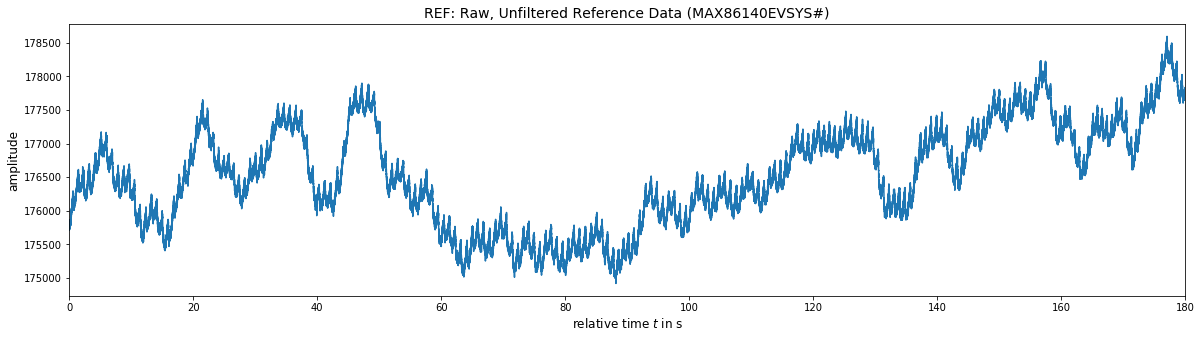

In [3]:
plot_signal(data["time"], data["signal"],
            title="REF: Raw, Unfiltered Reference Data (MAX86140EVSYS#)",
            xlabel="relative time $t$ in s", ylabel="amplitude")

### Example 1: Raw, Unfiltered Reference Data

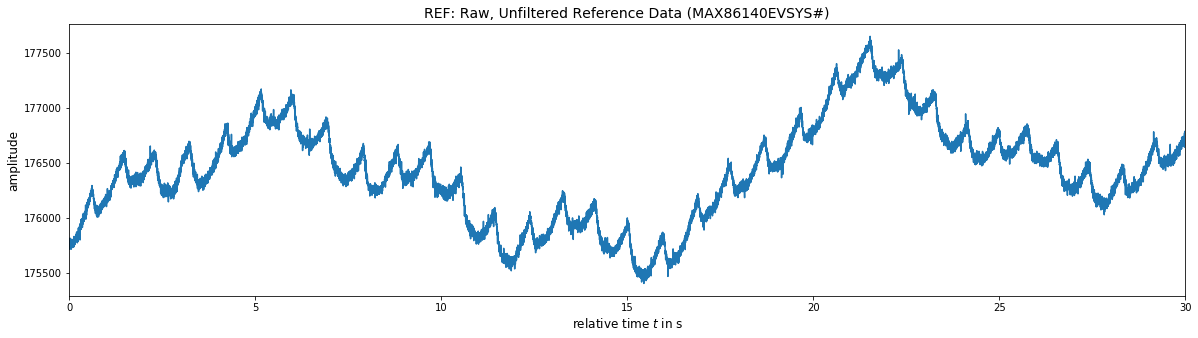

In [4]:
# Plot excerpt from the reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], data["signal"][bgn:end],
            title="REF: Raw, Unfiltered Reference Data (MAX86140EVSYS#)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

 TIME BASE
+-----------------------+----------+
| time base provided    |      yes |
| time base             |        s |
| length                |  180.0 s |
| offset                |    0.0 s |
| desired sampling rate | 512.0 Hz |
| real sampling rate    | 512.0 Hz |
| jitter                |     None |
+-----------------------+----------+
 AMPLITUDE
+---------+--------------------+
| minimum |             174920 |
| maximum |             178594 |
| span    |               3674 |
| median  |           176503.0 |
| mean    | 176529.05933159724 |
+---------+--------------------+
 GRANULARITY
+------------------+------+
| number of values | 3477 |
| granularity      |    1 |
+------------------+------+
 NORMALIZATION
+-------------------+----+
| zero-centered     | no |
| [0,1]-normalized  | no |
| [-1,1]-normalized | no |
+-------------------+----+
 AMPLITUDE FLIPPING
+----------------------------+--------------------+
| center of mass             | -90.80133928571428 |
|              

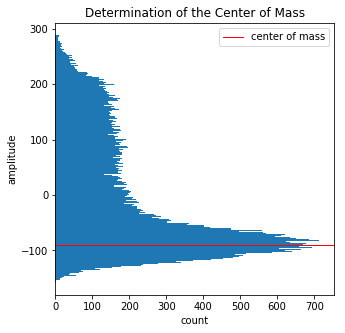

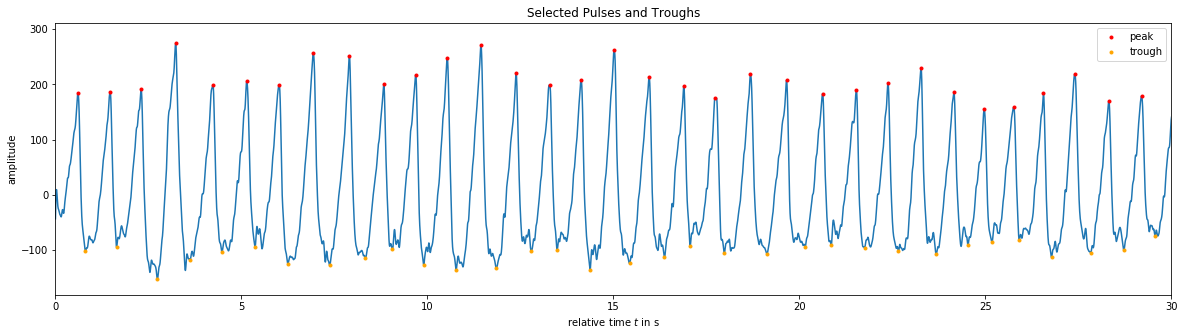

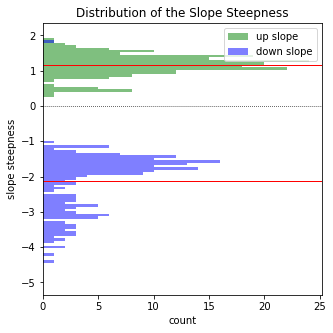

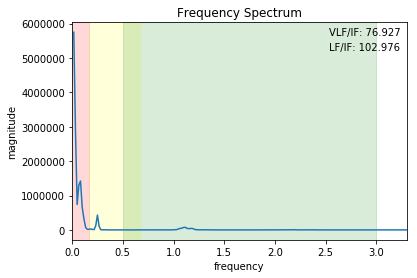

In [5]:
ppg = PPGraw(data["time"], data["signal"], data["fs"])
_ = ppg.review(plot=True, debug=True)

### Example 2: Band-pass Filtered Including Respiratory Rate
* 2nd order band-pass filter, 0.167 Hz lower and 15.0 Hz upper corner frequencies

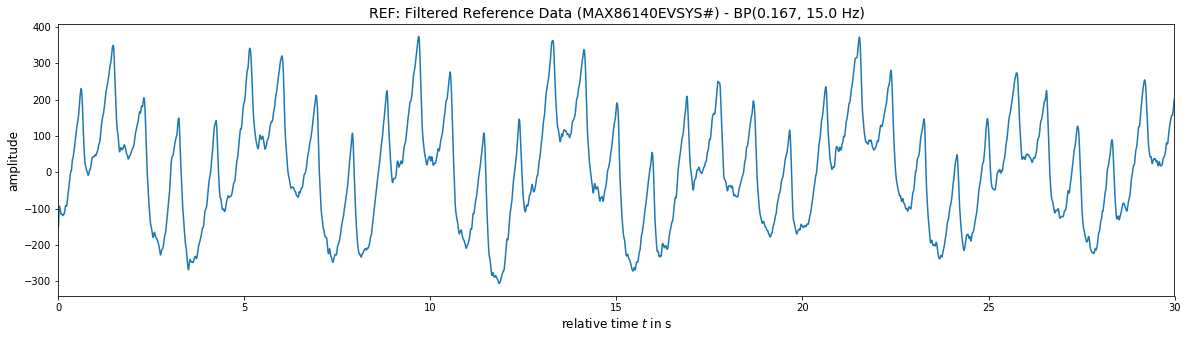

In [6]:
bp_fc_low = 0.166667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

# Apply band-pass filter.
signal_bp = ppg.bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Plot excerpt from reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

 AMPLITUDE
+---------+---------------------+
| minimum | -384.13067786930344 |
| maximum |   434.7014623446675 |
| span    |   818.8321402139709 |
| median  | 0.08511802524793918 |
| mean    |  0.6072874324680732 |
+---------+---------------------+
 GRANULARITY
+------------------+------------------------+
| number of values |                  92160 |
| granularity      | 1.2596501619555056e-08 |
+------------------+------------------------+
 NORMALIZATION
+-------------------+-----+
| zero-centered     | yes |
| [0,1]-normalized  |  no |
| [-1,1]-normalized |  no |
+-------------------+-----+
 FREQUENCY DOMAIN
+----------------+--------------------+
| VLF max        |  8476.836771977532 |
| LF max         |  306902.8700878342 |
| IF max         |  74723.60857635917 |
| VLF mean       | 2966.9447085474885 |
| LF mean        |  17612.51240900373 |
| IF mean        |  4190.623167234474 |
| VLF med        | 2038.8578443256513 |
| LF med         | 1347.0925720200723 |
| IF med         |  3

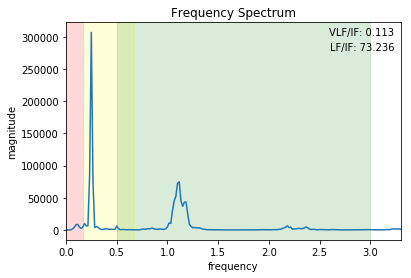

In [7]:
ppg = PPGraw(data["time"], signal_bp, data["fs"])
_ = ppg.review_amplitude(debug=True)
_ = ppg.review_granularity(debug=True)
_ = ppg.review_normalization(debug=True)
_ = ppg.review_frequency(plot=True, debug=True)

### Example 3: Band-pass Filtered Excluding Respiratory Rate
* 2nd order band-pass filter, 0.667 Hz lower and 15.0 Hz upper corner frequencies

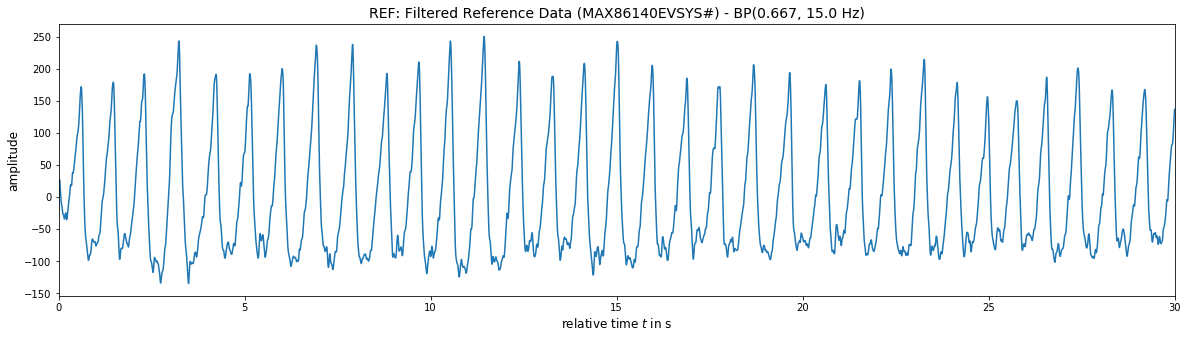

In [8]:
bp_fc_low = 0.666667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

# Apply band-pass filter.
signal_bp = ppg.bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Plot excerpt from reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

 AMPLITUDE
+---------+---------------------+
| minimum | -141.49909812501681 |
| maximum |   277.0740728326448 |
| span    |   418.5731709576616 |
| median  |  -38.37259455094127 |
| mean    | 0.05228495099652007 |
+---------+---------------------+
 GRANULARITY
+------------------+------------------------+
| number of values |                  92160 |
| granularity      | 1.0037820175057277e-07 |
+------------------+------------------------+
 NORMALIZATION
+-------------------+-----+
| zero-centered     | yes |
| [0,1]-normalized  |  no |
| [-1,1]-normalized |  no |
+-------------------+-----+
 FREQUENCY DOMAIN
+----------------+------------------------+
| VLF max        |     1.3361244396780738 |
| LF max         |     318.08864529013533 |
| IF max         |      62729.37978961591 |
| VLF mean       |     0.2507463739704881 |
| LF mean        |      42.92518032582982 |
| IF mean        |     3502.5712243198927 |
| VLF med        |    0.08090259351418475 |
| LF med         |     24.257

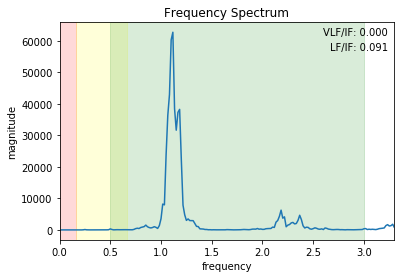

In [9]:
ppg = PPGraw(data["time"], signal_bp, data["fs"])
_ = ppg.review_amplitude(debug=True)
_ = ppg.review_granularity(debug=True)
_ = ppg.review_normalization(debug=True)
_ = ppg.review_frequency(plot=True, debug=True)

### Example 4: [0,1] Normalizaton
* 2nd order band-pass filter, 0.667 Hz lower and 15.0 Hz upper corner frequencies
* [0,1]-normalization

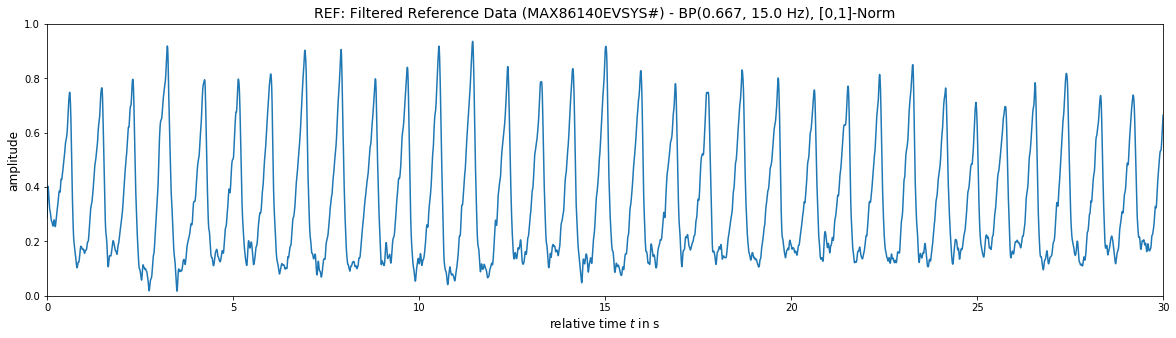

In [10]:
bp_fc_low = 0.666667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

# Apply band-pass filter.
signal_bp = ppg.bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Normalize to [0,1].
signal_bp_norm01 = ppg.norm01(signal_bp)

# Plot excerpt from reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp_norm01[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz), [0,1]-Norm",
            xlabel="relative time $t$ in s", ylabel="amplitude", ylim=(0,1))
plt.show()

In [11]:
ppg = PPGraw(data["time"], signal_bp_norm01, data["fs"])
_ = ppg.review_amplitude(debug=True)
_ = ppg.review_granularity(debug=True)
_ = ppg.review_normalization(debug=True)

 AMPLITUDE
+---------+---------------------+
| minimum |                 0.0 |
| maximum |                 1.0 |
| span    |                 1.0 |
| median  | 0.24637628670306422 |
| mean    | 0.33817595798640226 |
+---------+---------------------+
 GRANULARITY
+------------------+-----------------------+
| number of values |                 92160 |
| granularity      | 2.398104215206587e-10 |
+------------------+-----------------------+
 NORMALIZATION
+-------------------+-----+
| zero-centered     |  no |
| [0,1]-normalized  | yes |
| [-1,1]-normalized |  no |
+-------------------+-----+


### Example 5: [-1,1] Normalizaton
* 2nd order band-pass filter, 0.667 Hz lower and 15.0 Hz upper corner frequencies
* [-1,1]-normalization

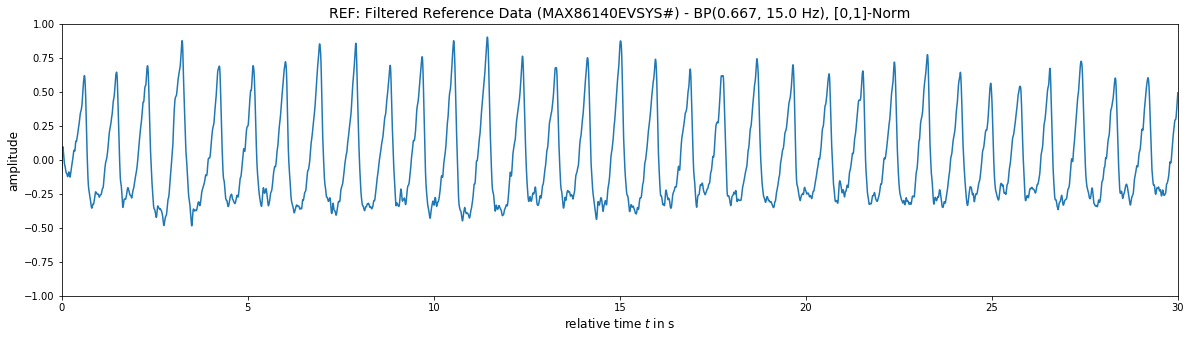

In [12]:
bp_fc_low = 0.666667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

# Apply band-pass filter.
signal_bp = ppg.bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Normalize to [-1,1].
signal_bp_norm11 = ppg.norm11(signal_bp)

# Plot excerpt from reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp_norm11[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz), [0,1]-Norm",
            xlabel="relative time $t$ in s", ylabel="amplitude", ylim=(-1,1))
plt.show()

In [13]:
ppg = PPGraw(data["time"], signal_bp_norm11, data["fs"])
_ = ppg.review_amplitude(debug=True)
_ = ppg.review_granularity(debug=True)
_ = ppg.review_normalization(debug=True)

 AMPLITUDE
+---------+------------------------+
| minimum |    -0.5106905048112659 |
| maximum |                    1.0 |
| span    |      1.510690504811266 |
| median  |   -0.13849218787828865 |
| mean    | 0.00018870387424556862 |
+---------+------------------------+
 GRANULARITY
+------------------+-----------------------+
| number of values |                 92160 |
| granularity      | 3.622792621449378e-10 |
+------------------+-----------------------+
 NORMALIZATION
+-------------------+-----+
| zero-centered     | yes |
| [0,1]-normalized  |  no |
| [-1,1]-normalized | yes |
+-------------------+-----+


### Example 6: Amplitude Flipping
* 2nd order band-pass filter, 0.667 Hz lower and 15.0 Hz upper corner frequencies
* [0,1]-normalization
* amplitude flipping

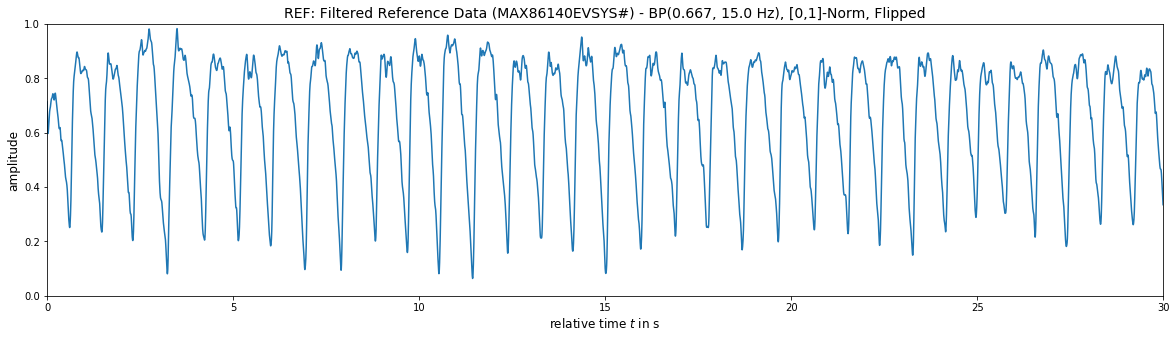

In [14]:
bp_fc_low = 0.666667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

# Apply band-pass filter.
signal_bp = ppg.bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Flip amplitude and normalize to [0,1].
signal_bp_flip_norm01 = ppg.norm01(ppg.flip(signal_bp))

# Plot excerpt from reference signal.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp_flip_norm01[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz), [0,1]-Norm, Flipped",
            xlabel="relative time $t$ in s", ylabel="amplitude", ylim=(0,1))
plt.show()

 AMPLITUDE
+---------+---------------------+
| minimum |             -178594 |
| maximum |             -174920 |
| span    |                3674 |
| median  |           -176503.0 |
| mean    | -176529.05933159724 |
+---------+---------------------+
 GRANULARITY
+------------------+------+
| number of values | 3477 |
| granularity      |    1 |
+------------------+------+
 NORMALIZATION
+-------------------+----+
| zero-centered     | no |
| [0,1]-normalized  | no |
| [-1,1]-normalized | no |
+-------------------+----+
 AMPLITUDE FLIPPING
+----------------------------+--------------------+
| center of mass             |   90.8013392857143 |
|                            |                    |
| number of detected peaks   |                203 |
| number of detected troughs |                188 |
| mean rising slope          |  2.125461054682306 |
| mean falling slope         | 1.1614891235327796 |
|                            |                    |
| flipped (center of mass)   |          

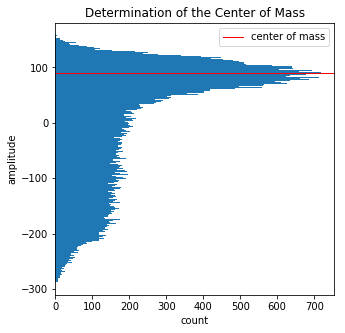

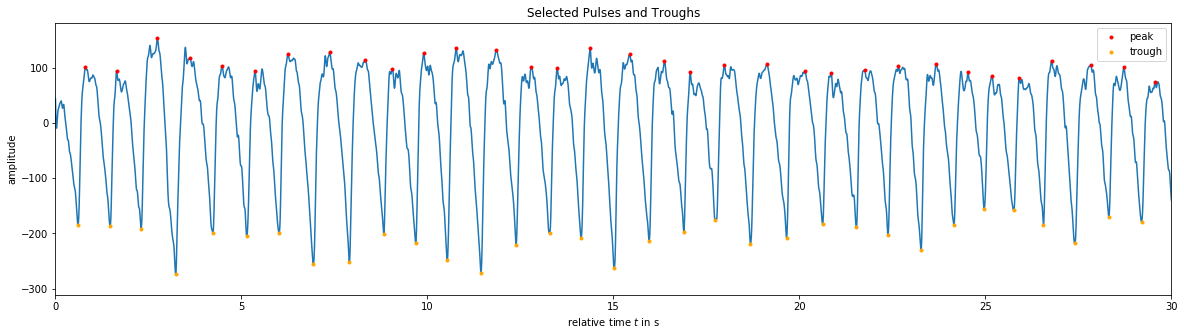

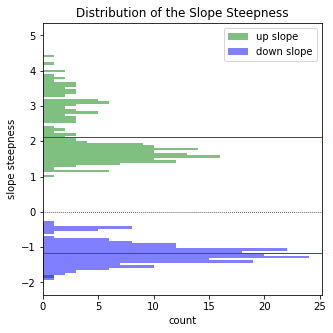

In [15]:
# Flip amplitude of the raw signal.
signal_flip = ppg.flip(data["signal"])

ppg = PPGraw(data["time"], signal_flip, data["fs"])
_ = ppg.review_amplitude(debug=True)
_ = ppg.review_granularity(debug=True)
_ = ppg.review_normalization(debug=True)
_ = ppg.review_flip(plot=True, debug=True)